## Toronto Crime Analysis

In [1]:
%matplotlib notebook

In [2]:
import requests
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pprint import pprint
from pandas.io.json import json_normalize
from IPython.display import clear_output
from scipy import stats

In [3]:
education = pd.read_csv('../output/crimes_with_education.csv')
income = pd.read_csv('../output/crimes_with_income.csv')

In [4]:
income_edu = pd.merge(education,income,on='hood_id')
income_edu.head()

,hood_id,Assault_x,Auto Theft_x,Break and Enter_x,Robbery_x,Theft Over_x,No Degree %,Highschool %,Post-secondary %,Assault_y,Auto Theft_y,Break and Enter_y,Robbery_y,Theft Over_y,Average Income
0,1,1082,1181,503,306,192,21.711624,30.942861,47.345515,1082,1181,503,306,192,31138.833333
1,2,1048,217,140,387,14,30.363227,30.199156,39.437617,1048,217,140,387,14,26815.000000
2,3,225,62,86,92,10,24.651538,27.933076,47.415387,225,62,86,92,10,32880.500000
3,4,285,83,62,75,4,22.421935,30.246291,47.331774,285,83,62,75,4,34970.500000
4,5,246,59,56,78,5,25.276329,33.990772,40.732899,246,59,56,78,5,31303.500000


/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:937: UserWarning: Legend does not support 'data' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:937: UserWarning: Legend does not support 'line-regression' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


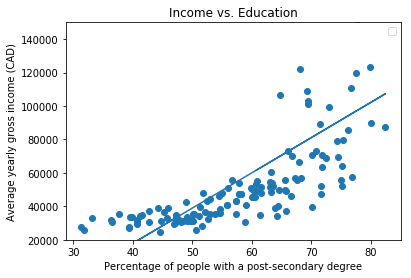

In [5]:
x = income_edu['Post-secondary %']
y = income_edu['Average Income']

plt.scatter(x,y)
plt.ylim(20000,150000)
plt.title('Income vs. Education')
plt.xlabel('Percentage of people with a post-secondary degree')
plt.ylabel('Average yearly gross income (CAD)')

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
plt.plot(x,intercept + slope*x)   
plt.legend(('data', 'line-regression'), 'upper left')
plt.savefig('../output/crimes-vs-education')